In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_behavior_train.csv to customer_behavior_train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Replace with the actual file name if different

































Shape: (1800, 8)


,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,2.29,5.37,1,10.00,Facebook,143.14,D,1
1,7.49,16.36,0,25.52,Instagram,136.66,A,1
2,5.71,13.69,0,10.00,Google,67.13,C,0
3,1.23,3.22,1,41.49,Google,92.12,C,0
4,3.55,10.72,0,21.57,Direct,70.31,B,0


In [ ]:
# Summary and info
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-null   float64
 2   Clicked_ad            1800 non-null   int64  
 3   Cart_value            1800 non-null   float64
 4   Referral              1800 non-null   object 
 5   Browser_Refresh_Rate  1800 non-null   float64
 6   Last_Ad_Seen          1800 non-null   object 
 7   Purchase              1800 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 112.6+ KB


In [ ]:
df.isnull().sum()


,0
Time_on_site,0
Pages_viewed,0
Clicked_ad,0
Cart_value,0
Referral,0
Browser_Refresh_Rate,0
Last_Ad_Seen,0
Purchase,0


In [ ]:
df.nunique()

,0
Time_on_site,739
Pages_viewed,1239
Clicked_ad,2
Cart_value,1353
Referral,4
Browser_Refresh_Rate,1735
Last_Ad_Seen,4
Purchase,2


In [ ]:
df.describe(include='all')


,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
count,1800.000000,1800.000000,1800.000000,1800.000000,1800,1800.000000,1800,1800.000000
unique,NaN,NaN,NaN,NaN,4,NaN,4,NaN
top,NaN,NaN,NaN,NaN,Google,NaN,C,NaN
freq,NaN,NaN,NaN,NaN,741,NaN,481,NaN
mean,4.962244,12.429483,0.301111,50.352933,NaN,100.662100,NaN,0.292222
std,2.336373,6.381941,0.458868,47.443390,NaN,51.645694,NaN,0.454910
min,0.500000,0.760000,0.000000,10.000000,NaN,-65.800000,NaN,0.000000
25%,3.300000,7.860000,0.000000,13.862500,NaN,65.430000,NaN,0.000000
50%,4.935000,12.020000,0.000000,34.690000,NaN,99.735000,NaN,0.000000
75%,6.610000,16.500000,1.000000,67.630000,NaN,134.755000,NaN,1.000000


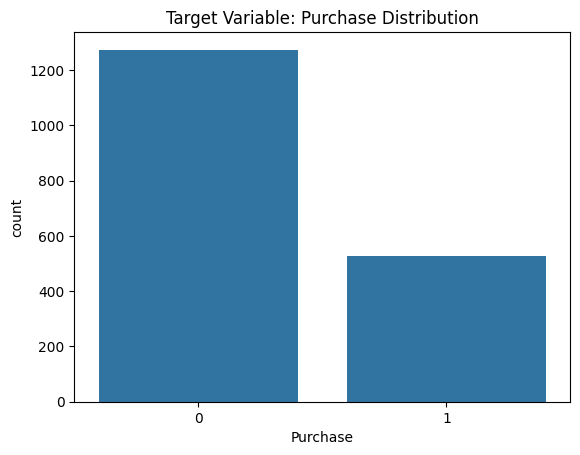

Purchase
0    70.777778
1    29.222222
Name: proportion, dtype: float64


In [ ]:
# Visualizing target distribution
sns.countplot(data=df, x='Purchase')
plt.title("Target Variable: Purchase Distribution")
plt.show()

print(df['Purchase'].value_counts(normalize=True) * 100)


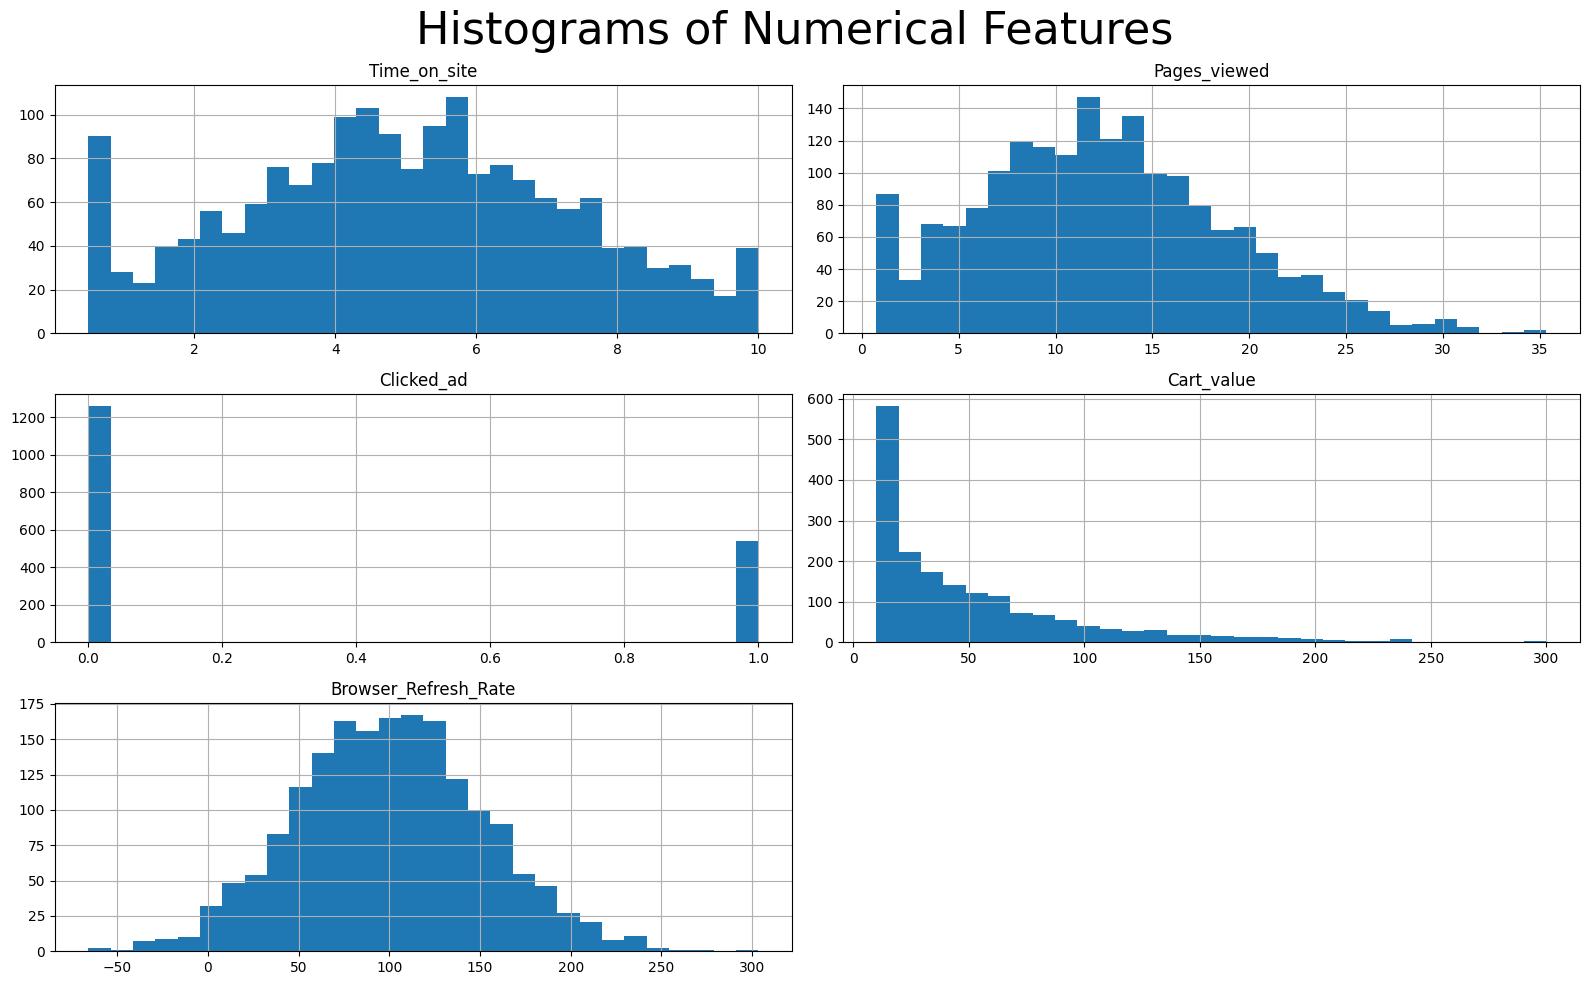

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Purchase')  # exclude target

df[num_cols].hist(figsize=(16, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", fontsize=32)
plt.tight_layout()
plt.show()


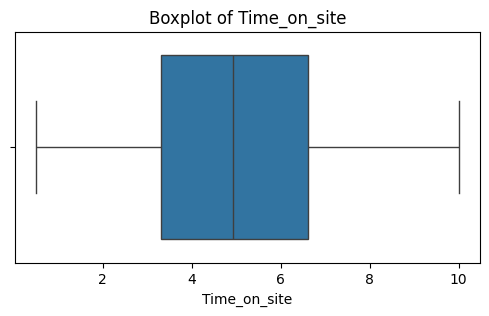

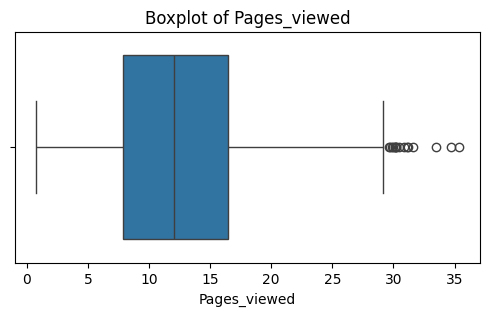

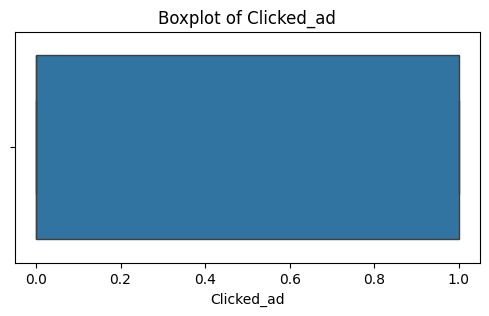

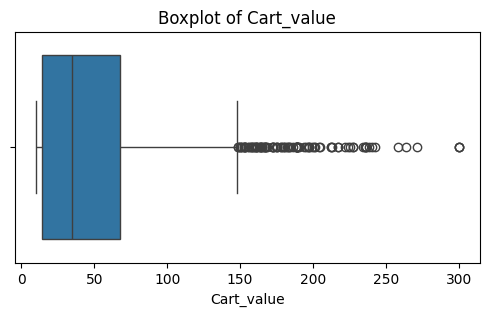

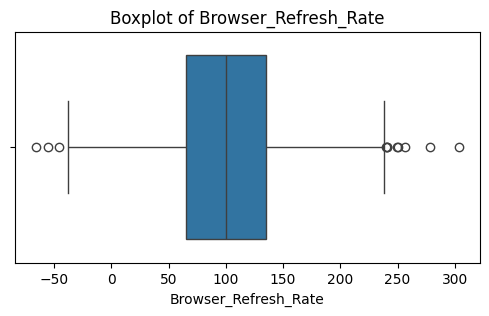

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:

top_pos = correlations[1:4].index.tolist()
top_neg = correlations[-3:].index.tolist()
pairplot_cols = top_pos + top_neg + ['Purchase']

sns.pairplot(df[pairplot_cols], hue='Purchase')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()


NameError: name 'correlations' is not defined

Feature Correlation with Purchase:
 Purchase                1.000000
Pages_viewed            0.358996
Time_on_site            0.344128
Clicked_ad              0.283907
Cart_value              0.137851
Browser_Refresh_Rate   -0.005686
Name: Purchase, dtype: float64


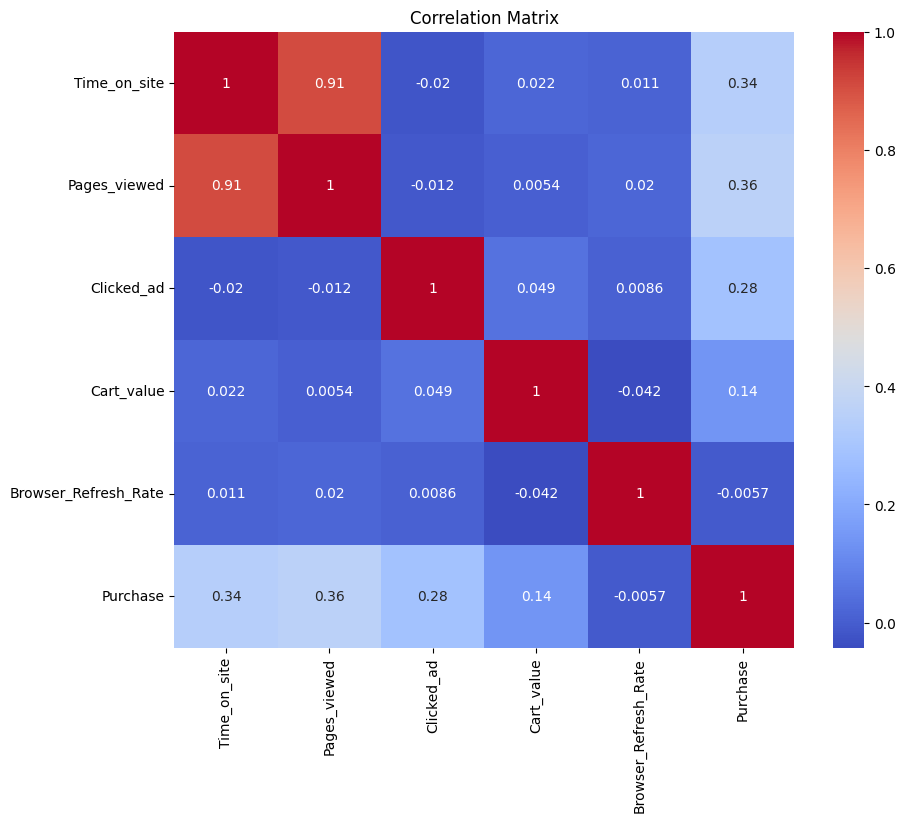

In [ ]:
# Correlation with 'Purchase'
correlations = df[num_cols + ['Purchase']].corr()['Purchase'].sort_values(ascending=False)
print("Feature Correlation with Purchase:\n", correlations)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols + ['Purchase']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Find low-variance or ID-like columns
irrelevant = [col for col in df.columns if df[col].nunique() == 1 or 'id' in col.lower()]
print("Potentially Irrelevant Columns:", irrelevant)

# Drop if needed
df.drop(columns=irrelevant, inplace=True)
print("Remaining columns:", df.columns.tolist())


Potentially Irrelevant Columns: []
Remaining columns: ['Time_on_site', 'Pages_viewed', 'Clicked_ad', 'Cart_value', 'Referral', 'Browser_Refresh_Rate', 'Last_Ad_Seen', 'Purchase']


SUBTASK -1
REFER THE  ATTACHED DOC


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_behavior_train.csv to customer_behavior_train (3).csv


In [ ]:
import pandas as pd
df = pd.read_csv('customer_behavior_train.csv')
#

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd

# Load data
df = pd.read_csv("customer_behavior_train.csv")

# Separate features and target
X = df.drop(columns=["Purchase"])
y = df["Purchase"]

# One-hot encode categorical columns (automatically detects non-numeric)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[238  24]
 [ 59  39]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       262
           1       0.62      0.40      0.48        98

    accuracy                           0.77       360
   macro avg       0.71      0.65      0.67       360
weighted avg       0.75      0.77      0.75       360



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_behavior_train.csv to customer_behavior_train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('customer_behavior_train.csv')

In [ ]:
df.head()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,2.29,5.37,1,10.00,Facebook,143.14,D,1
1,7.49,16.36,0,25.52,Instagram,136.66,A,1
2,5.71,13.69,0,10.00,Google,67.13,C,0
3,1.23,3.22,1,41.49,Google,92.12,C,0
4,3.55,10.72,0,21.57,Direct,70.31,B,0


In [ ]:
X = df.drop(columns=['Purchase'])  # or your actual target column
y = df['Purchase']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7555555555555555
Confusion Matrix:
 [[225  37]
 [ 51  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       262
           1       0.56      0.48      0.52        98

    accuracy                           0.76       360
   macro avg       0.69      0.67      0.68       360
weighted avg       0.75      0.76      0.75       360



In [ ]:
print(y.value_counts())


Purchase
0    1274
1     526
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [ ]:
X_train, X_test, y_train, y_test


(      Time_on_site  Pages_viewed  Clicked_ad  Cart_value  Referral  \
 832           3.95          8.36           1       67.26         2   
 836           8.62         24.44           0       76.48         1   
 1103          5.71         13.26           0       10.00         0   
 859           5.39         13.38           0       50.82         2   
 567           6.26         15.88           0       10.00         1   
 ...            ...           ...         ...         ...       ...   
 1130          4.24          9.44           0       34.37         0   
 1294          6.63         22.05           0       10.00         1   
 860           5.76         14.34           0       46.51         2   
 1459          4.34         10.61           0       10.00         0   
 1126          4.70          8.60           0       10.64         3   
 
       Browser_Refresh_Rate  Last_Ad_Seen  
 832                 110.49             0  
 836                  48.17             0  
 1103         

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.7666666666666667
F1 Score: 0.46835443037974683
Precision: 0.6166666666666667
Recall: 0.37755102040816324


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))


XGBoost
Accuracy: 0.7555555555555555
F1 Score: 0.5164835164835165
Precision: 0.5595238095238095
Recall: 0.47959183673469385


In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb)
    ]
})

print(results)


                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.766667  0.468354   0.616667  0.377551
1              XGBoost  0.755556  0.516484   0.559524  0.479592


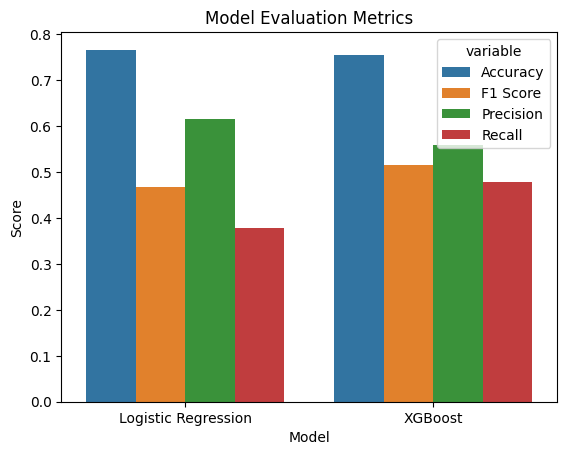

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=results.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

# Best parameters and score
print("🔹 Best Logistic Regression Params:", grid_lr.best_params_)
print("🔹 Best CV F1 Score:", grid_lr.best_score_)

# Predict with best model
best_lr = grid_lr.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)


🔹 Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
🔹 Best CV F1 Score: 0.48568271617304976


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter space for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42
)
 random_xgb.fit(X_train, y_train)

# Best parameters and score
print(" Best XGBoost Params:", random_xgb.best_params_)
print(" Best CV F1 Score:", random_xgb.best_score_)

# Predict with best model
best_xgb = random_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)


IndentationError: unexpected indent (<ipython-input-3-e6a55ee36a83>, line 22)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

tuned_results = pd.DataFrame({
    "Model": ["Logistic Regression (Tuned)", "XGBoost (Tuned)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_xgb_tuned)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_xgb_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_xgb_tuned)
    ]
})

print(tuned_results)


                         Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression (Tuned)  0.766667  0.468354   0.616667  0.377551
1              XGBoost (Tuned)  0.788889  0.573034   0.637500  0.520408


SUBTASK -4  COMPARATIVE ANALYSIS

**COMPARING BOTH THE MODEL BASED ON THEIR PERFORMANCE METRICS**


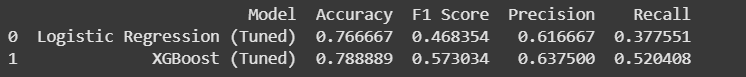


We can see from above that XGBOOST  has performed better on all evaluation metrics

This is because XGBOOST is advanced ensemble model and




 * it capture feature interactions  and non linearity ., whereas logistic   regression cannot do both
* It also handles complex datasets easily better than logistic regression
* It has flexible decision boundaries as well



      LOGISTIC REGRESSION :

STRENGTHS :
* It is simple , easy to interpret
* Fast to train
* Works well for binary target variable

WEAKNESS
 *  It struggles in real world messy data as it is complex and has non linear patterns



        XGBOOST

STRENGTHS :
* It handles complex , high dimensional data
* It captures feature interactions automatically
* Good generalization and tuning control
* It works well with non linear data


WEAKNESS
* Slower to train

                  


Based on the evaluation metrics, XGBoost outperforms Logistic Regression in accuracy, F1 score, precision, and recall. This suggests that the dataset contains non-linear patterns and interactions that Logistic Regression cannot capture. While Logistic Regression is simpler and interpretable, XGBoost's tree-based approach makes it more powerful for complex classification tasks like this one. Therefore, XGBoost is the preferred model in this scenario due to its stronger ability to generalize and detect patterns























In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

tuned_results = pd.DataFrame({
    "Model": ["Logistic Regression (Tuned)", "XGBoost (Tuned)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_xgb_tuned)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_xgb_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_xgb_tuned)
    ]
})

print(tuned_results)


                         Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression (Tuned)  0.766667  0.468354   0.616667  0.377551
1              XGBoost (Tuned)  0.788889  0.573034   0.637500  0.520408


In [ ]:


import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)



In [ ]:
class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, residuals):
        m, n = X.shape
        best_loss = float('inf')

        for feature in range(n):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_idx = X[:, feature] <= t
                right_idx = X[:, feature] > t
                if len(residuals[left_idx]) == 0 or len(residuals[right_idx]) == 0:
                    continue
                left_value = np.mean(residuals[left_idx])
                right_value = np.mean(residuals[right_idx])
                predictions = np.where(left_idx, left_value, right_value)
                loss = np.mean((residuals - predictions) ** 2)

                if loss < best_loss:
                    best_loss = loss
                    self.feature_index = feature
                    self.threshold = t
                    self.left_value = left_value
                    self.right_value = right_value

    def predict(self, X):
        return np.where(X[:, self.feature_index] <= self.threshold,
                        self.left_value, self.right_value)

class XGBoostScratch:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.lr = learning_rate
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros(y.shape)
        for _ in range(self.n_estimators):
            residuals = y - 1 / (1 + np.exp(-y_pred))  # pseudo residuals
            stump = DecisionStump()
            stump.fit(X, residuals)
            prediction = stump.predict(X)
            y_pred += self.lr * prediction
            self.trees.append(stump)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.lr * tree.predict(X)
        return np.where(1 / (1 + np.exp(-y_pred)) >= 0.5, 1, 0)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Fit and evaluate scratch Logistic Regression
log_scratch = LogisticRegressionScratch()
log_scratch.fit(X_train, y_train)
y_pred_log_scratch = log_scratch.predict(X_test)

# Fit and evaluate scratch XGBoost-like model
xgb_scratch = XGBoostScratch(n_estimators=10)
xgb_scratch.fit(X_train.values, y_train.values)
y_pred_xgb_scratch = xgb_scratch.predict(X_test.values)

# Evaluation
print("Logistic Regression (Scratch):", accuracy_score(y_test, y_pred_log_scratch), f1_score(y_test, y_pred_log_scratch))
print("XGBoost (Scratch):", accuracy_score(y_test, y_pred_xgb_scratch), f1_score(y_test, y_pred_xgb_scratch))


NameError: name 'LogisticRegressionScratch' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('customer_behavior_train.csv')

# Separate features and target
X = df.drop(columns=['Purchase'])
y = df['Purchase']

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode target if needed
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42
)


FileNotFoundError: [Errno 2] No such file or directory: 'customer_behavior_train.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_behavior_train.csv to customer_behavior_train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('customer_behavior_train.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('customer_behavior_train.csv')

# Separate features and target
X = df.drop(columns=['Purchase'])
y = df['Purchase']

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode target if needed
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42
)


In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.X = np.c_[np.ones((self.m, 1)), X]  # Add intercept
        self.y = y
        self.theta = np.zeros(self.n + 1)

        for _ in range(self.epochs):
            z = np.dot(self.X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(self.X.T, (h - self.y)) / self.m
            self.theta -= self.lr * gradient

    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_proba(X) >= 0.5


In [ ]:
log_scratch = LogisticRegressionScratch()
log_scratch.fit(X_train, y_train)
y_pred_log_scratch = log_scratch.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print("Logistic Regression (Scratch) Accuracy:", accuracy_score(y_test, y_pred_log_scratch))
print("F1 Score:", f1_score(y_test, y_pred_log_scratch))


Logistic Regression (Scratch) Accuracy: 0.31666666666666665
F1 Score: 0.4383561643835616


In [ ]:
class SimpleXGBoost:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.gammas = []

    def fit(self, X, y):
        pred = np.full(y.shape, 0.5)
        self.models = []

        for _ in range(self.n_estimators):
            residual = y - pred
            stump = self._fit_stump(X, residual)
            update = stump.predict(X)
            gamma = self.learning_rate
            pred += gamma * update

            self.models.append(stump)
            self.gammas.append(gamma)

    def _fit_stump(self, X, residual):
        from sklearn.tree import DecisionTreeRegressor
        stump = DecisionTreeRegressor(max_depth=1)
        stump.fit(X, residual)
        return stump

    def predict(self, X):
        pred = np.full((X.shape[0],), 0.5)
        for gamma, model in zip(self.gammas, self.models):
            pred += gamma * model.predict(X)
        return pred >= 0.5


In [ ]:
xgb_scratch = SimpleXGBoost()
xgb_scratch.fit(X_train, y_train)
y_pred_xgb_scratch = xgb_scratch.predict(X_test)

print("XGBoost (Scratch) Accuracy:", accuracy_score(y_test, y_pred_xgb_scratch))
print("F1 Score:", f1_score(y_test, y_pred_xgb_scratch))


XGBoost (Scratch) Accuracy: 0.7722222222222223
F1 Score: 0.3387096774193548


In [ ]:
bonus_results = pd.DataFrame({
    "Model": ["Logistic Regression (Scratch)", "XGBoost (Scratch)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log_scratch),
        accuracy_score(y_test, y_pred_xgb_scratch)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log_scratch),
        f1_score(y_test, y_pred_xgb_scratch)
    ]
})


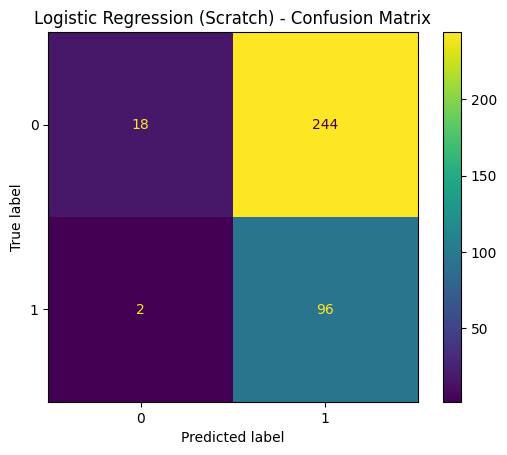

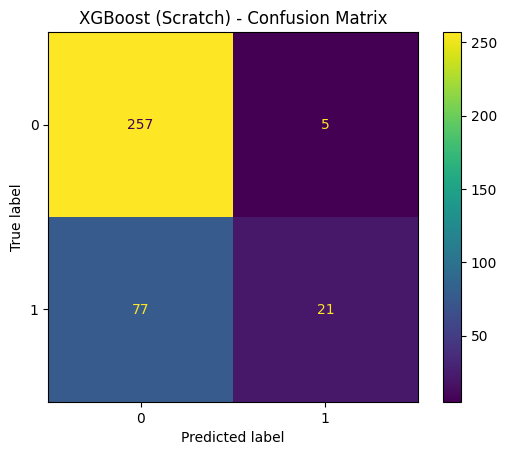

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_scratch)
plt.title("Logistic Regression (Scratch) - Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_scratch)
plt.title("XGBoost (Scratch) - Confusion Matrix")
plt.show()


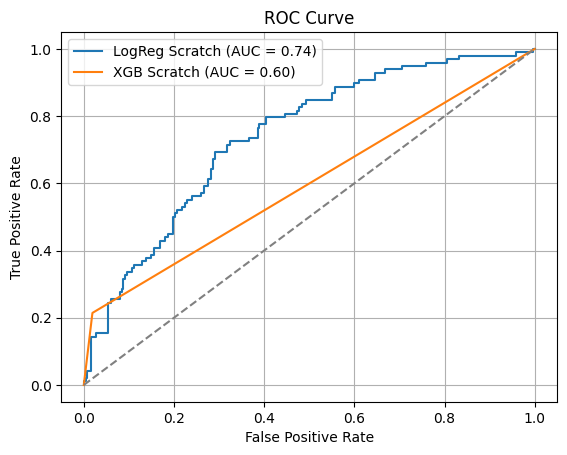

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# For Logistic Regression Scratch
y_prob_log = log_scratch.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr, tpr, label=f"LogReg Scratch (AUC = {auc(fpr, tpr):.2f})")

# For XGBoost Scratch
y_prob_xgb = xgb_scratch.predict(X_test).astype(float)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGB Scratch (AUC = {auc(fpr_xgb, tpr_xgb):.2f})")

plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
noise = np.random.normal(0, 0.1, X_test.shape)
X_test_noisy = X_test + noise

y_pred_log_noise = log_scratch.predict(X_test_noisy)
y_pred_xgb_noise = xgb_scratch.predict(X_test_noisy)

print("LogReg Scratch (Noise) Accuracy:", accuracy_score(y_test, y_pred_log_noise))
print("XGBoost Scratch (Noise) Accuracy:", accuracy_score(y_test, y_pred_xgb_noise))


LogReg Scratch (Noise) Accuracy: 0.3138888888888889
XGBoost Scratch (Noise) Accuracy: 0.775
